In [ ]:
#import required libraries

import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#read dataset

data=pd.read_csv('/content/drive/MyDrive/dataset/traintest2.csv')

In [ ]:
data.head(10)

,comment_text,toxic,severe_toxic,obscene,insult
0,Explanation\nWhy the edits made under my usern...,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,1
7,Your vandalism to the Matt Shirvington article...,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0


In [ ]:
# check for duplicate rows
duplicates = data[data.duplicated()]

# print the number of duplicates found
print("Number of duplicate rows:", len(duplicates))

Number of duplicate rows: 1


In [ ]:
data.shape

(159571, 5)

In [ ]:
data.info

<bound method DataFrame.info of                                              comment_text  toxic  \
0       Explanation\nWhy the edits made under my usern...      0   
1       D'aww! He matches this background colour I'm s...      0   
2       Hey man, I'm really not trying to edit war. It...      0   
3       "\nMore\nI can't make any real suggestions on ...      0   
4       You, sir, are my hero. Any chance you remember...      0   
...                                                   ...    ...   
159566  ":::::And for the second time of asking, when ...      0   
159567  You should be ashamed of yourself \n\nThat is ...      0   
159568  Spitzer \n\nUmm, theres no actual article for ...      0   
159569  And it looks like it was actually you who put ...      0   
159570  "\nAnd ... I really don't think you understand...      0   

        severe_toxic  obscene  insult  
0                  0        0       0  
1                  0        0       0  
2                  0        0  

pre-processing

In [ ]:
import re

# function to clean HTML tags from text
def clean_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

# apply the clean_html_tags function to the comment_text column
data['comment_text'] = data['comment_text'].apply(clean_html_tags)


data

,comment_text,toxic,severe_toxic,obscene,insult
0,Explanation\nWhy the edits made under my usern...,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0
...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0


In [ ]:
# function to convert text to lowercase
def convert_to_lower(text):
    return text.lower()

# apply the convert_to_lower function to the comment_text column
data['comment_text'] = data['comment_text'].apply(convert_to_lower)

data

,comment_text,toxic,severe_toxic,obscene,insult
0,explanation\nwhy the edits made under my usern...,0,0,0,0
1,d'aww! he matches this background colour i'm s...,0,0,0,0
2,"hey man, i'm really not trying to edit war. it...",0,0,0,0
3,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0
4,"you, sir, are my hero. any chance you remember...",0,0,0,0
...,...,...,...,...,...
159566,""":::::and for the second time of asking, when ...",0,0,0,0
159567,you should be ashamed of yourself \n\nthat is ...,0,0,0,0
159568,"spitzer \n\numm, theres no actual article for ...",0,0,0,0
159569,and it looks like it was actually you who put ...,0,0,0,0


In [ ]:
# function to remove special characters from text
def remove_special_chars(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

# apply the remove_special_chars function to the comment_text column
data['comment_text'] = data['comment_text'].apply(remove_special_chars)

data

,comment_text,toxic,severe_toxic,obscene,insult
0,explanation\nwhy the edits made under my usern...,0,0,0,0
1,daww he matches this background colour im seem...,0,0,0,0
2,hey man im really not trying to edit war its j...,0,0,0,0
3,\nmore\ni cant make any real suggestions on im...,0,0,0,0
4,you sir are my hero any chance you remember wh...,0,0,0,0
...,...,...,...,...,...
159566,and for the second time of asking when your vi...,0,0,0,0
159567,you should be ashamed of yourself \n\nthat is ...,0,0,0,0
159568,spitzer \n\numm theres no actual article for p...,0,0,0,0
159569,and it looks like it was actually you who put ...,0,0,0,0


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# define the list of stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords from text
def remove_stopwords(text):
    words = text.split()
    return " ".join([word for word in words if word not in stop_words])

# apply the remove_stopwords function to the comment_text column
data['comment_text'] = data['comment_text'].apply(remove_stopwords)

data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,comment_text,toxic,severe_toxic,obscene,insult
0,explanation edits made username hardcore metal...,0,0,0,0
1,daww matches background colour im seemingly st...,0,0,0,0
2,hey man im really trying edit war guy constant...,0,0,0,0
3,cant make real suggestions improvement wondere...,0,0,0,0
4,sir hero chance remember page thats,0,0,0,0
...,...,...,...,...,...
159566,second time asking view completely contradicts...,0,0,0,0
159567,ashamed horrible thing put talk page 128611993,0,0,0,0
159568,spitzer umm theres actual article prostitution...,0,0,0,0
159569,looks like actually put speedy first version d...,0,0,0,0


In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.stem.wordnet import WordNetLemmatizer

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
wnl = WordNetLemmatizer()
y = []

def lemma(text):
    for i in text:
        y.append(wnl.lemmatize(i))
    z = y[:]
    y.clear()
    return z

data

,comment_text,toxic,severe_toxic,obscene,insult
0,explanation edits made username hardcore metal...,0,0,0,0
1,daww matches background colour im seemingly st...,0,0,0,0
2,hey man im really trying edit war guy constant...,0,0,0,0
3,cant make real suggestions improvement wondere...,0,0,0,0
4,sir hero chance remember page thats,0,0,0,0
...,...,...,...,...,...
159566,second time asking view completely contradicts...,0,0,0,0
159567,ashamed horrible thing put talk page 128611993,0,0,0,0
159568,spitzer umm theres actual article prostitution...,0,0,0,0
159569,looks like actually put speedy first version d...,0,0,0,0


FEATURE EXTRACTION

In [ ]:
import gensim.downloader as api

# Load GloVe pre-trained word embeddings
model = api.load("glove-wiki-gigaword-300")

# Define a function to get the average word embeddings of a sentence
def get_avg_word_embeddings(sentence):
    words = sentence.split()
    embeddings = []
    for word in words:
        try:
            embeddings.append(model[word])
        except KeyError:
            pass
    if len(embeddings) > 0:
        return sum(embeddings) / len(embeddings)
    else:
        return []

# Apply the function on your preprocessed text data
data['word_embeddings'] = data['comment_text'].apply(get_avg_word_embeddings)

[=================================================-] 99.5% 374.2/376.1MB downloaded


In [ ]:
data.head(20)


,comment_text,toxic,severe_toxic,obscene,insult,word_embeddings
0,explanation edits made username hardcore metal...,0,0,0,0,"[-0.062244117, -0.08784831, 0.03367203, -0.042..."
1,daww matches background colour im seemingly st...,0,0,0,0,"[0.019785948, 0.03508953, 0.07976249, 0.066583..."
2,hey man im really trying edit war guy constant...,0,0,0,0,"[-0.17849827, -0.06388649, 0.013416228, 0.0028..."
3,cant make real suggestions improvement wondere...,0,0,0,0,"[-0.11523514, 0.035207767, -0.06411029, 0.0036..."
4,sir hero chance remember page thats,0,0,0,0,"[-0.0080811605, -0.1128465, 0.22630583, -0.314..."
5,congratulations well use tools well talk,0,0,0,0,"[-0.17033131, 0.15530667, 0.18091166, -0.14793..."
6,cocksucker piss around work,1,1,1,1,"[0.009146999, 0.0047115386, -0.12302033, -0.05..."
7,vandalism matt shirvington article reverted pl...,0,0,0,0,"[0.1524435, -0.09795624, -0.0618665, 0.0230047..."
8,sorry word nonsense offensive anyway im intend...,0,0,0,0,"[-0.057576995, 0.029571593, -0.009231992, -0.0..."
9,alignment subject contrary dulithgow,0,0,0,0,"[-0.32170668, -0.3458967, 0.10483667, -0.02080..."


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split



# Split the dataset into input features and target labels
X = data["comment_text"]
y = data[["toxic", "severe_toxic", "obscene", "insult"]]

# Split the input features and target labels into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (127656,)
y_train shape: (127656, 4)
X_test shape: (31915,)
y_test shape: (31915, 4)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the maximum number of words to keep in the tokenizer's vocabulary
max_words = 10000

# Define the maximum length of each sequence (i.e., number of words per comment)
max_len = 150

# Create a tokenizer to convert comments into sequences of integers
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

import pickle

# Define the path to the file where you want to save the tokenizer
tokenizer_path = '/content/drive/MyDrive/toxic data/tokenizer.pickle'

# Save the tokenizer to a file using pickle
with open(tokenizer_path, 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Convert the training and testing comments into sequences of integers
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to ensure that they all have the same length
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len)

# Build the bi-LSTM model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=64, input_length=max_len),
    Bidirectional(LSTM(64, dropout=0.5, recurrent_dropout=0.5)),
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(4, activation="sigmoid")
])


# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Print the model summary
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 64)           640000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 714,564
Trainable params: 714,564
Non-trainable params: 0
__________________________________________________

In [ ]:

# Train the model on the training data
model.fit(X_train_padded, y_train, batch_size=2048, epochs=15, validation_data=(X_test_padded, y_test))


Epoch 1/15
63/63 [==============================] - 133s 2s/step - loss: 0.3014 - accuracy: 0.4857 - val_loss: 0.1900 - val_accuracy: 0.9939
Epoch 2/15
63/63 [==============================] - 98s 2s/step - loss: 0.1714 - accuracy: 0.6859 - val_loss: 0.1026 - val_accuracy: 0.9929
Epoch 3/15
63/63 [==============================] - 98s 2s/step - loss: 0.0920 - accuracy: 0.7718 - val_loss: 0.0802 - val_accuracy: 0.9945
Epoch 4/15
63/63 [==============================] - 106s 2s/step - loss: 0.0778 - accuracy: 0.8277 - val_loss: 0.0768 - val_accuracy: 0.9945
Epoch 5/15
63/63 [==============================] - 101s 2s/step - loss: 0.0711 - accuracy: 0.8646 - val_loss: 0.0766 - val_accuracy: 0.9945
Epoch 6/15
63/63 [==============================] - 94s 1s/step - loss: 0.0671 - accuracy: 0.8994 - val_loss: 0.0727 - val_accuracy: 0.9945
Epoch 7/15
63/63 [==============================] - 92s 1s/step - loss: 0.0644 - accuracy: 0.9146 - val_loss: 0.0710 - val_accuracy: 0.9945
Epoch 8/15
63/63 

In [ ]:
from sklearn.metrics import mean_squared_error

# Get predictions from your model
y_pred = model.predict(X_test)

# Calculate mean squared error (MSE) for each output dimension
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')

# Print MSE for each output dimension
for i in range(len(mse)):
    print(f"Output dimension {i}: MSE = {mse[i]}")


UnimplementedError: ignored

In [ ]:
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix

# Define the label names
label_names = ['toxic', 'severe_toxic', 'obscene', 'insult']

# Get the predicted labels for the test set
y_pred = model.predict(X_test_padded)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels

# Compute the confusion matrix
cm = multilabel_confusion_matrix(y_test, y_pred)

# Print the confusion matrix for each label
for i, label in enumerate(label_names):
    print(f"Confusion matrix for label '{label}':")
    print(cm[i])
    print()


998/998 [==============================] - 94s 94ms/step
Confusion matrix for label 'toxic':
[[28419   440]
 [  872  2184]]

Confusion matrix for label 'severe_toxic':
[[31584    10]
 [  304    17]]

Confusion matrix for label 'obscene':
[[29957   243]
 [  436  1279]]

Confusion matrix for label 'threat':
[[29908   393]
 [  611  1003]]



In [ ]:
prediction_NN = model.predict(X_test_padded)
# print(prediction_NN)
prediction_NN = np.argmax(prediction_NN, axis=-1)
# prediction_NN = le.inverse_transform(prediction_NN)

998/998 [==============================] - 92s 93ms/step


In [ ]:
\
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

NameError: ignored

In [ ]:
# Use the model to make predictions on the testing data
y_pred = model.predict(X_test_padded)

# Convert the predicted probabilities to binary labels
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate the evaluation metrics for each label
for i, label in enumerate(y_test.columns):
    print("Label:", label)
    print("Accuracy:", accuracy_score(y_test.iloc[:, i], y_pred_binary[:, i]))
    print("Precision:", precision_score(y_test.iloc[:, i], y_pred_binary[:, i]))
    print("Recall:", recall_score(y_test.iloc[:, i], y_pred_binary[:, i]))
    print("F1-score:", f1_score(y_test.iloc[:, i], y_pred_binary[:, i]))
    print("\n")

998/998 [==============================] - 89s 88ms/step
Label: toxic
Accuracy: 0.958890803697321
Precision: 0.8323170731707317
Recall: 0.7146596858638743
F1-score: 0.7690140845070422


Label: severe_toxic
Accuracy: 0.9901613661287796
Precision: 0.6296296296296297
Recall: 0.0529595015576324
F1-score: 0.09770114942528736


Label: obscene
Accuracy: 0.9787247375842081
Precision: 0.8403416557161629
Recall: 0.7457725947521866
F1-score: 0.790237874575224


Label: insult
Accuracy: 0.968541438195206
Precision: 0.7184813753581661
Recall: 0.6214374225526642
F1-score: 0.6664451827242525




In [ ]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix for each label
for i, label in enumerate(y_test.columns):
    print("Label:", label)
    cm = confusion_matrix(y_test.iloc[:, i], y_pred_binary[:, i])
    print(cm)
    print("\n")

Label: toxic
[[28419   440]
 [  872  2184]]


Label: severe_toxic
[[31584    10]
 [  304    17]]


Label: obscene
[[29957   243]
 [  436  1279]]


Label: insult
[[29908   393]
 [  611  1003]]




Label: toxic


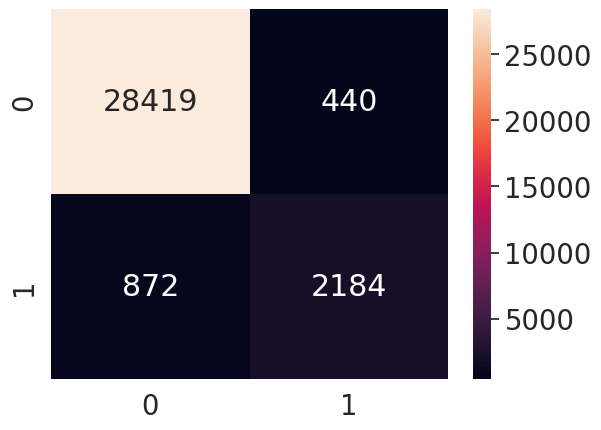

Label: severe_toxic


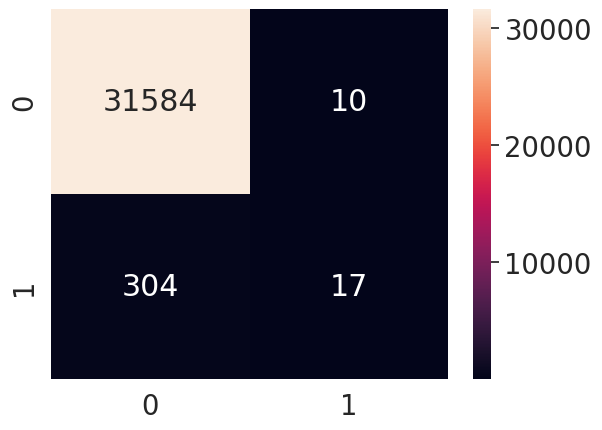

Label: obscene


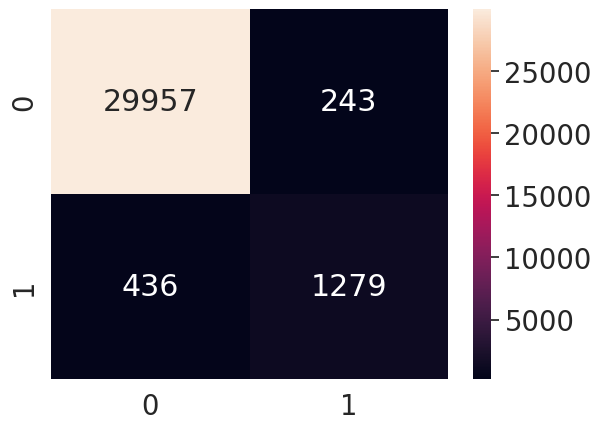

Label: insult


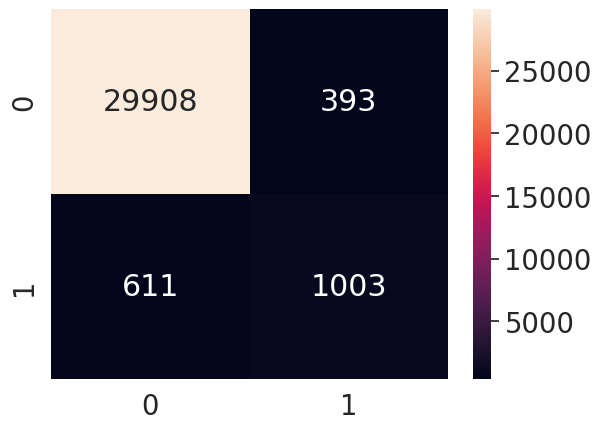

In [ ]:
import seaborn as sns

# Calculate the confusion matrix for each label
for i, label in enumerate(y_test.columns):
    print("Label:", label)
    cm = confusion_matrix(y_test.iloc[:, i], y_pred_binary[:, i])
    sns.heatmap(cm, annot=True, fmt='g')
    plt.show()


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, classification_report

# Use the model to make predictions on the testing data
y_pred = model.predict(X_test_padded)

# Convert the predicted probabilities to binary labels
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate the multilabel confusion matrix
cm = multilabel_confusion_matrix(y_test, y_pred_binary)
print(cm)

# Print the confusion matrix for each label
for i, label in enumerate(y_test.columns):
    print("Label:", label)
    print(cm[i])
    print("\n")

# Calculate the classification report
cr = classification_report(y_test, y_pred_binary, target_names=y_test.columns)
print(cr)


998/998 [==============================] - 117s 117ms/step
[[[28419   440]
  [  872  2184]]

 [[31584    10]
  [  304    17]]

 [[29957   243]
  [  436  1279]]

 [[29908   393]
  [  611  1003]]]
Label: toxic
[[28419   440]
 [  872  2184]]


Label: severe_toxic
[[31584    10]
 [  304    17]]


Label: obscene
[[29957   243]
 [  436  1279]]


Label: insult
[[29908   393]
 [  611  1003]]


              precision    recall  f1-score   support

       toxic       0.83      0.71      0.77      3056
severe_toxic       0.63      0.05      0.10       321
     obscene       0.84      0.75      0.79      1715
      insult       0.72      0.62      0.67      1614

   micro avg       0.80      0.67      0.73      6706
   macro avg       0.76      0.53      0.58      6706
weighted avg       0.80      0.67      0.72      6706
 samples avg       0.06      0.06      0.06      6706



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import  multilabel_confusion_matrix
from sklearn.metrics import  confusion_matrix
import seaborn as sns

print(y_test.shape)
print(prediction_NN.shape)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_decoded = le.inverse_transform(prediction_NN)

# # Visualizing confusion matrix
from sklearn.metrics import multilabel_confusion_matrix

# y_test and prediction_NN are arrays of labels with one label per sample
cm = multilabel_confusion_matrix(y_test, y_decoded)

# Print the confusion matrix for each label
for i, label in enumerate(np.unique(y_test)):
    print(f'Confusion matrix for label {label}:')
    print(cm[i])
    print()

# plt.figure(figsize=(35,27))
# sns.set(font_scale=1.8)
# fx=sns.heatmap(cm, annot=True,fmt='.4f',cmap="GnBu")
# fx.set_title('Confusion Matrix \n');
# fx.set_xlabel('\n Predicted Values\n')
# fx.set_ylabel('Actual Values\n');
# fx.xaxis.set_ticklabels(label)
# fx.yaxis.set_ticklabels(label)
# plt.show()

(31915, 4)
(31915,)


NotFittedError: ignored

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Define the label for which to plot the confusion matrix
label = 'label1'

# Get the confusion matrix for the given label
cm = confusion_matrix(y_test[label], y_pred_binary[:, y_test.columns.get_loc(label)])

# Plot the confusion matrix
plt.imshow(cm, cmap='Blues')
plt.title(f'Confusion matrix for {label}')
plt.colorbar()
tick_marks = np.arange(len(['Negative', 'Positive']))
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Display the plot
plt.show()


KeyError: ignored

In [ ]:
# # Predict on the test data
# y_pred = model.predict(X_test_padded)

# # Convert the predicted probabilities to binary labels
# threshold = 0.5 # adjust this value to control the trade-off between precision and recall
# y_pred_binary = (y_pred > threshold).astype(int)

# # Evaluate the model performance on the test data
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# accuracy = accuracy_score(y_test, y_pred_binary)
# precision = precision_score(y_test, y_pred_binary, average='weighted')
# recall = recall_score(y_test, y_pred_binary, average='weighted')
# f1 = f1_score(y_test, y_pred_binary, average='weighted')

# print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 score: {f1:.4f}")


In [ ]:
model.save('/content/drive/MyDrive/dataset/my_model7.h5')

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/toxic data/my_model8.h5')

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import load_model
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# # Load the saved model
# model = load_model('/content/drive/MyDrive/toxic data/my_model3.h5')

# # Load the tokenizer used for training the model
# with open('/content/drive/MyDrive/toxic data/tokenizer.pickle', 'rb') as handle:
#     tokenizer = pickle.load(handle)

# # Define the maximum sequence length and class labels
# MAX_SEQUENCE_LENGTH = 150
# CLASS_LABELS = ['negative', 'neutral', 'positive']

# # Define a function to predict the sentiment of a comment
# def predict_sentiment(comment):
#     # Tokenize the comment
#     sequences = tokenizer.texts_to_sequences([comment])
#     # Pad the sequences to the maximum length
#     padded_sequences = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
#     # Make the prediction
#     prediction = model.predict(padded_sequences)[0]
#     # Get the index of the predicted class
#     predicted_class = tf.argmax(prediction).numpy()
#     # Get the corresponding class label
#     predicted_label = CLASS_LABELS[predicted_class]
#     # Return the predicted label and confidence score
#     return predicted_label, prediction[predicted_class]

# # Example usage
# comment = "This product is terrible"
# label, score = predict_sentiment(comment)
# print(f"The sentiment of the comment '{comment}' is {label} with a confidence score of {score}")


In [ ]:
 import pickle
  # Load the tokenizer used for training the model
with open('/content/drive/MyDrive/toxic data/tokenizer.pickle', 'rb') as handle:
     tokenizer = pickle.load(handle)

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Collect the new comment input from the user
new_comment = "fuck "

# Define the maximum sequence length and class labels
max_len = 150

#Preprocess the input using the tokenizer and padding techniques

new_comment_seq = tokenizer.texts_to_sequences([new_comment])
new_comment_padded = pad_sequences(new_comment_seq, maxlen=max_len)

# Use the trained model to make predictions on the preprocessed input
y_pred = model.predict(new_comment_padded)

# Convert the predicted probabilities to binary labels
y_pred_binary = (y_pred > 0.2).astype(int)

# Display the predicted labels to the user
labels = ["toxic", "severe_toxic", "obscene", "insult"]
for i, label in enumerate(labels):
    print(label, ":", y_pred_binary[0][i])

# # Display the predicted labels to the user
# labels = ["toxic", "severe_toxic", "obscene", "insult"]
# for i, label in enumerate(labels):
#     print(label, ":", y_pred[0][i])

1/1 [==============================] - 0s 91ms/step
toxic : 0
severe_toxic : 0
obscene : 0
threat : 0
insult : 0


other feature extraction

In [ ]:
#import gensim.downloader as api
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# import tensorflow as tf
# from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:

# # Load GloVe pre-trained word embeddings
# model = api.load("glove-wiki-gigaword-300")

# # Define a function to get the average word embeddings of a sentence
# def get_avg_word_embeddings(sentence):
#     words = sentence.split()
#     embeddings = []
#     for word in words:
#         try:
#             embeddings.append(model[word])
#         except KeyError:
#             pass
#     if len(embeddings) > 0:
#         return sum(embeddings) / len(embeddings)
#     else:
#         return []

In [ ]:
# # Apply the function on your preprocessed text data
# data['word_embeddings'] = data['comment_text'].apply(get_avg_word_embeddings)

In [ ]:
# # Split the dataset into input features and target labels
# X = data["comment_text"]
# y = data[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]]

# # Split the input features and target labels into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# # Define the maximum number of words to keep in the tokenizer's vocabulary
# max_words = 10000

# # Define the maximum length of each sequence (i.e., number of words per comment)
# max_len = 150

# # Create a tokenizer to convert comments into sequences of integers
# tokenizer = Tokenizer(num_words=max_words)
# tokenizer.fit_on_texts(X_train)

# # Convert the training and testing comments into sequences of integers
# X_train_seq = tokenizer.texts_to_sequences(X_train)
# X_test_seq = tokenizer.texts_to_sequences(X_test)

# # Pad the sequences to ensure that they all have the same length
# X_train_padded = pad_sequences(X_train_seq, maxlen=max_len)
# X_test_padded = pad_sequences(X_test_seq, maxlen=max_len)

In [ ]:
# # Build the bi-LSTM model
# model = Sequential([
#     Embedding(input_dim=max_words, output_dim=64, input_length=max_len),
#     Bidirectional(LSTM(64, dropout=0.5, recurrent_dropout=0.5)),
#     Dense(64, activation="relu"),
#     Dropout(0.5),
#     Dense(6, activation="softmax")
# ])

# # Compile the model with categorical cross-entropy loss and Adam optimizer
# model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# # Print the model summary
# model.summary()

In [ ]:

# # Get the embedding matrix for the words in the tokenizer's vocabulary
# word_index = tokenizer.word_index
# num_words = min(max_words, len(word_index) + 1)
# embedding_dim = 300  # the dimension of the pre-trained GloVe embeddings
# embedding_matrix = np.zeros((num_words, embedding_dim))
# for word, i in word_index.items():
#     if i >= max_words:
#         continue
#     embedding_vector = glove_model.get(word)
#     if embedding_vector is not None:
#         # words not found in embedding index will be all-zeros
#         embedding_matrix[i] = embedding_vector

# # Define the bi-LSTM model with pre-trained embeddings
# model = Sequential([
#     Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=False),
#     SpatialDropout1D(0.3),
#     Bidirectional(LSTM(128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True)),
#     Conv1D(64, kernel_size=3, padding="valid", kernel_initializer="glorot_uniform"),
#     GlobalMaxPooling1D(),
#     Dense(64, activation="relu"),
#     Dropout(0.5),
#     Dense(6, activation="softmax")
# ])

# # Compile the model with categorical cross-entropy loss and Adam optimizer
# model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# # Print the model summary
# model.summary()

In [ ]:

# # Train the model on the training data
# model.fit(X_train_padded, y_train, batch_size=2048, epochs=10, validation_data=(X_test_padded, y_test))


In [ ]:
# Evaluate the model on the testing data
# model.evaluate(X_test_padded, y_test)

In [ ]:
# Use the model to make predictions on the testing data
# y_pred = model.predict(X_test_padded)

In [ ]:
# Convert the predicted probabilities to binary labels
# y_pred_binary = (y_pred > 0.5).astype(int)

In [ ]:

# Convert the predicted probabilities to binary labels
# y_pred_binary = (y_pred > 0.5).astype(int)


In [ ]:
# # Calculate the evaluation metrics for each label
# for i, label in enumerate(y_test.columns):
#     print("Label:", label)
#     print("Accuracy:", accuracy_score(y_test.iloc[:, i], y_pred_binary[:, i]))
#     print("Precision:", precision_score(y_test.iloc[:, i], y_pred_binary[:, i]))
#     print("Recall:", recall_score(y_test.iloc[:, i], y_pred_binary[:, i]))
#     print("F1-score:", f1_score(y_test.iloc[:, i], y_pred_binary[:, i]))
    # print("\n")